# Fishery dataset: Predicting caught weight with machine learning

In this project, we aim to create machine learning models to predict the live weight of fish caught from fishing operations. We will try to uncover important and predictive features of the fishing operations which will be used as parameters in our models.

**[Part A - Preprocessing](#part_a)**

This part starts by initializing python and all the libraries we use to process the data. Further we perform exploratory data analysis (EDA) to understand the features, remove anomalies and redundant information in the dataset, thus preparing the data for modeling.

**[Part B - Supervised learning](#part_b)**

* Random Forest
* K-Nearest Neighbors (KNN)
* Deep Neural Network (DNN)

**[Part C - Unsupervised learning](#part_c)**

Techniques such as DBSCAN for clustering will be explored.


To run this file you need the following libraries:

```
matplotlib==3.8.2
matplotlib-inline==0.1.6
numpy==1.26.4
pandas==2.2.0
scikit-learn==1.4.0
scipy==1.12.0
seaborn
```

<a id="part_a"></a>
## Part A - Preprocessing

### Step 0 - Importing libraries and reading the data

To start the project, we need to import the most common libraries we will use to explore the data.

In [4]:
import math

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import DBSCAN

# Model evaluation and selection tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Data preprocessing and pipeline tools
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import StandardScaler

# Setting plot style
plt.style.use('ggplot')

### Step 1 - Reading the data

The data from the fishery reports are in the form of a CSV file. We read this file into a Pandas dataframe allowing for easy analysis and manipulation.

To ensure that the data was successfully loaded into the DataFrame, it can be useful to inspect the initial content. To do so we can use the `df.head(n)` function to display the first n rows and the column headers of the dataframe.

In [5]:
df = pd.read_csv('../Resources/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', delimiter=';')
df.head(5)

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


### Step 2 - Understanding the data

Now that we've loaded the data, we can start our analysis.

In [6]:
shape = df.shape
print("DataFrame contents")
print(f"Rows: {shape[0]}, Columns: {shape[1]}")

DataFrame contents
Rows: 305434, Columns: 45


In [7]:
print("DataFrame column names and their datatypes")
df.dtypes

DataFrame column names and their datatypes


Melding ID                    int64
Meldingstidspunkt            object
Meldingsdato                 object
Meldingsklokkeslett          object
Starttidspunkt               object
Startdato                    object
Startklokkeslett             object
Startposisjon bredde         object
Startposisjon lengde         object
Hovedområde start (kode)    float64
Hovedområde start            object
Lokasjon start (kode)       float64
Havdybde start                int64
Stopptidspunkt               object
Stoppdato                    object
Stoppklokkeslett             object
Varighet                      int64
Fangstår                      int64
Stopposisjon bredde          object
Stopposisjon lengde          object
Hovedområde stopp (kode)    float64
Hovedområde stopp            object
Lokasjon stopp (kode)       float64
Havdybde stopp                int64
Trekkavstand                float64
Redskap FAO (kode)           object
Redskap FAO                  object
Redskap FDIR (kode)         

In [8]:
df.describe()

,Melding ID,Hovedområde start (kode),Lokasjon start (kode),Havdybde start,Varighet,Fangstår,Hovedområde stopp (kode),Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart - FDIR (kode),Art - FDIR (kode),Art - gruppe (kode),Rundvekt,Lengdegruppe (kode),Bruttotonnasje 1969,Bruttotonnasje annen
count,3.054340e+05,303433.000000,303433.000000,305434.000000,305434.000000,305434.000000,303472.000000,303472.000000,305434.000000,3.054100e+05,305246.000000,300456.000000,300452.000000,300452.000000,3.004560e+05,304750.000000,234005.000000,74774.000000
mean,1.658783e+06,14.463737,19.074712,-228.025292,537.095526,2017.999941,14.430415,18.883353,-229.084850,1.566397e+04,46.489746,1326.729934,1414.625914,259.746585,7.438208e+03,4.575032,1408.386975,186.172573
std,9.130738e+04,13.001244,18.469340,226.062493,2201.624688,0.007677,12.973150,18.361244,224.277365,9.033085e+04,13.534202,614.506560,633.188386,320.124913,4.281086e+04,0.692769,1148.384145,165.761157
min,1.497177e+06,0.000000,0.000000,-5388.000000,0.000000,2017.000000,0.000000,0.000000,-5388.000000,0.000000e+00,11.000000,412.000000,211.000000,101.000000,0.000000e+00,3.000000,104.000000,21.000000
25%,1.567228e+06,5.000000,7.000000,-273.000000,123.000000,2018.000000,5.000000,7.000000,-274.000000,2.533000e+03,32.000000,1022.000000,1022.000000,201.000000,6.400000e+01,4.000000,496.000000,87.000000
50%,1.674230e+06,8.000000,12.000000,-196.000000,296.000000,2018.000000,8.000000,12.000000,-198.000000,7.598000e+03,51.000000,1032.000000,1032.000000,203.000000,3.000000e+02,5.000000,1184.000000,149.000000
75%,1.735590e+06,20.000000,24.000000,-128.000000,494.000000,2018.000000,20.000000,24.000000,-127.000000,2.259900e+04,55.000000,1038.000000,2202.000000,302.000000,2.236000e+03,5.000000,2053.000000,236.000000
max,1.800291e+06,81.000000,87.000000,1220.000000,125534.000000,2018.000000,81.000000,87.000000,1616.000000,1.588863e+07,80.000000,6619.000000,6619.000000,9903.000000,1.100000e+06,5.000000,9432.000000,1147.000000


The dataset contains in total 305.434 rows of data, with 45 columns. Having a large dataset is beneficial for machine learning purposes. Generally having more data gives us flexibility in choosing relevant features. It also grants us a larger training, testing, and validation datasets when building our models. This can result in higher accuracy, assuming the data is well-prepared and is of high quality.

# Step 2 - Data preparation

The dataset contains several columns which are unnecessary for our purpose. This includes the message report metadata, as well as duplicate columns which represents the same information in codes instead of words. We will now remove these columns.

In [9]:
df = df[[
    'Starttidspunkt','Startposisjon bredde', 'Startposisjon lengde', 'Hovedområde start',
    'Havdybde start', 'Stopptidspunkt', 'Varighet', 'Fangstår', 'Stopposisjon bredde', 
    'Stopposisjon lengde', 'Hovedområde stopp', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR',
    'Art - FDIR', 'Art - gruppe', 'Rundvekt', 'Bruttotonnasje annen', 
    'Bruttotonnasje 1969', 'Bredde', 'Fartøylengde'
    ]].copy()

Several of the datatypes which are supposed to be continuous numeric values but are interpreted as objects. This is likely because the numbers are all using comma as decimal seperator, which is the standard representation in Norway. There are also several date and time object columns which needs to be converted to datetime.

In [10]:
df['Starttidspunkt'] = pd.to_datetime(df['Starttidspunkt'], format='mixed')
df['Stopptidspunkt'] = pd.to_datetime(df['Stopptidspunkt'], format='mixed')

df['Fartøylengde'] = pd.to_numeric(df['Fartøylengde'].str.replace(',', '.'))
df['Bredde'] = pd.to_numeric(df['Bredde'].str.replace(',', '.'))

df['Startposisjon bredde'] = pd.to_numeric(df['Startposisjon bredde'].str.replace(',', '.'))
df['Startposisjon lengde'] = pd.to_numeric(df['Startposisjon lengde'].str.replace(',', '.'))

### Missing data

Given our large dataset, it's highly likely that some of the data will be missing, corrupt or unwanted.

Empty cells are considered null values. The models in sci kit learn will give us an error when encountering these. Therefore, it is important to deal with null values during the pre-processing phase.
 
We must decide whether to drop the rows and columns containing null values, or to fill in the missing cells with another value. The ladder approach is referred to as 'imputation'.

We use the `df.isna()` method on our dataframe to iterate each column checking for null values. `sum()` gives us the total for each column:

In [11]:
na_counts = df.isna().sum()
null_value_columns = na_counts[na_counts > 0]

print(f"Number of columns with no missing values: {len(na_counts[na_counts == 0])}")
null_value_columns

Number of columns with no missing values: 11


Hovedområde start         4124
Hovedområde stopp         4124
Trekkavstand                24
Redskap FDIR               188
Art - FDIR                4982
Art - gruppe              4982
Rundvekt                  4978
Bruttotonnasje annen    230660
Bruttotonnasje 1969      71429
Bredde                     684
dtype: int64

We observe that 10 of our remaining 21 columns contain missing values. Among these, the columns concerning "Bruttotonnasje" have a significant amount of missing values. Let's examine these more closely.

In [12]:
null_count = df[df[['Bruttotonnasje 1969', 'Bruttotonnasje annen']].isna().all(axis=1)].shape[0]
print(f'Number of rows with both columns null: {null_count}')

overlap_count = df[(df['Bruttotonnasje 1969'] == df['Bruttotonnasje annen']) & df['Bruttotonnasje 1969'].notna()].shape[0]
print(f'Number of rows with overlapping values: {overlap_count}')

Number of rows with both columns null: 2971
Number of rows with overlapping values: 0


We see that all rows have at least one of the two "Bruttotonnasje" columns. If we want to use these columns further we would have to combine them into one feature. However, since "Bruttotonnasje annen" are an ambiguous category which can consist many different standards of measuring Bruttotonnasje, it can be a challenge to merge then, since it doesn't have a 1:1 relation.

To further evaluate what to do with these columns, we shall look at their relation to our target, "Rundvekt". We also want to evaluate its relation to a feature which can be closely related, "Fartøylengde".

In [13]:
def filter_not_null_and_drop(df: pd.DataFrame, a: str, b: str):
    filtered_df = df[df[a].notna()]
    return filtered_df.drop(columns=[b])

In [14]:
a = "Bruttotonnasje 1969"
b = "Bruttotonnasje annen"

filtered_df_sixty_nine = filter_not_null_and_drop(df, a, b)
filtered_df_other = filter_not_null_and_drop(df, b, a)

In [15]:
related_features = ["Fartøylengde", "Rundvekt"]
df_corr_brutto_sixty_nine = filtered_df_sixty_nine[[a] + related_features].corr()
df_corr_brutto_other = filtered_df_other[[b] + related_features].corr()

In [16]:
df_corr_brutto_sixty_nine

,Bruttotonnasje 1969,Fartøylengde,Rundvekt
Bruttotonnasje 1969,1.000000,0.923074,0.157229
Fartøylengde,0.923074,1.000000,0.186844
Rundvekt,0.157229,0.186844,1.000000


In [17]:
df_corr_brutto_other

,Bruttotonnasje annen,Fartøylengde,Rundvekt
Bruttotonnasje annen,1.000000,0.804281,0.145856
Fartøylengde,0.804281,1.000000,0.177152
Rundvekt,0.145856,0.177152,1.000000


Looking at these correlations we see that Fartøylengde and Bruttotonnasje have a high correlation, indicating that they are dependent on each other. Having two highly correlated features provide redundant information. Therefore, we choose to drop one of these. We choose to drop Bruttotonasje since this has a lower correlation to our target variable "Rundvekt".

In [18]:
df.drop(['Bruttotonnasje 1969', 'Bruttotonnasje annen'], axis=1, inplace=True)

In [19]:
rows_with_null = df.isna().any(axis=1)

# Count the number of rows with any null values
null_row_count = rows_with_null.sum()

print(f"Number of rows with any null values: {null_row_count}")
print(f"Percentage rows with null values: {null_row_count / df.shape[0] * 100:.2f} %")

Number of rows with any null values: 9631
Percentage rows with null values: 3.15 %


After dropping the "Bruttotonnasje" columns, the rows with null values are now only 3.15 % of the entire dataset. Removing these should have little effect on our models.

In [20]:
df = df.dropna()

## Step 3 - Feature Understanding

Here we will primarily use univariate analysis to understand the individual variables better.

To start off it's useful to draw histograms of all numeric variables. This will help us understand the variance of the data. Identify outliers can be important since models, such as DNN, can be sensitive for such values.

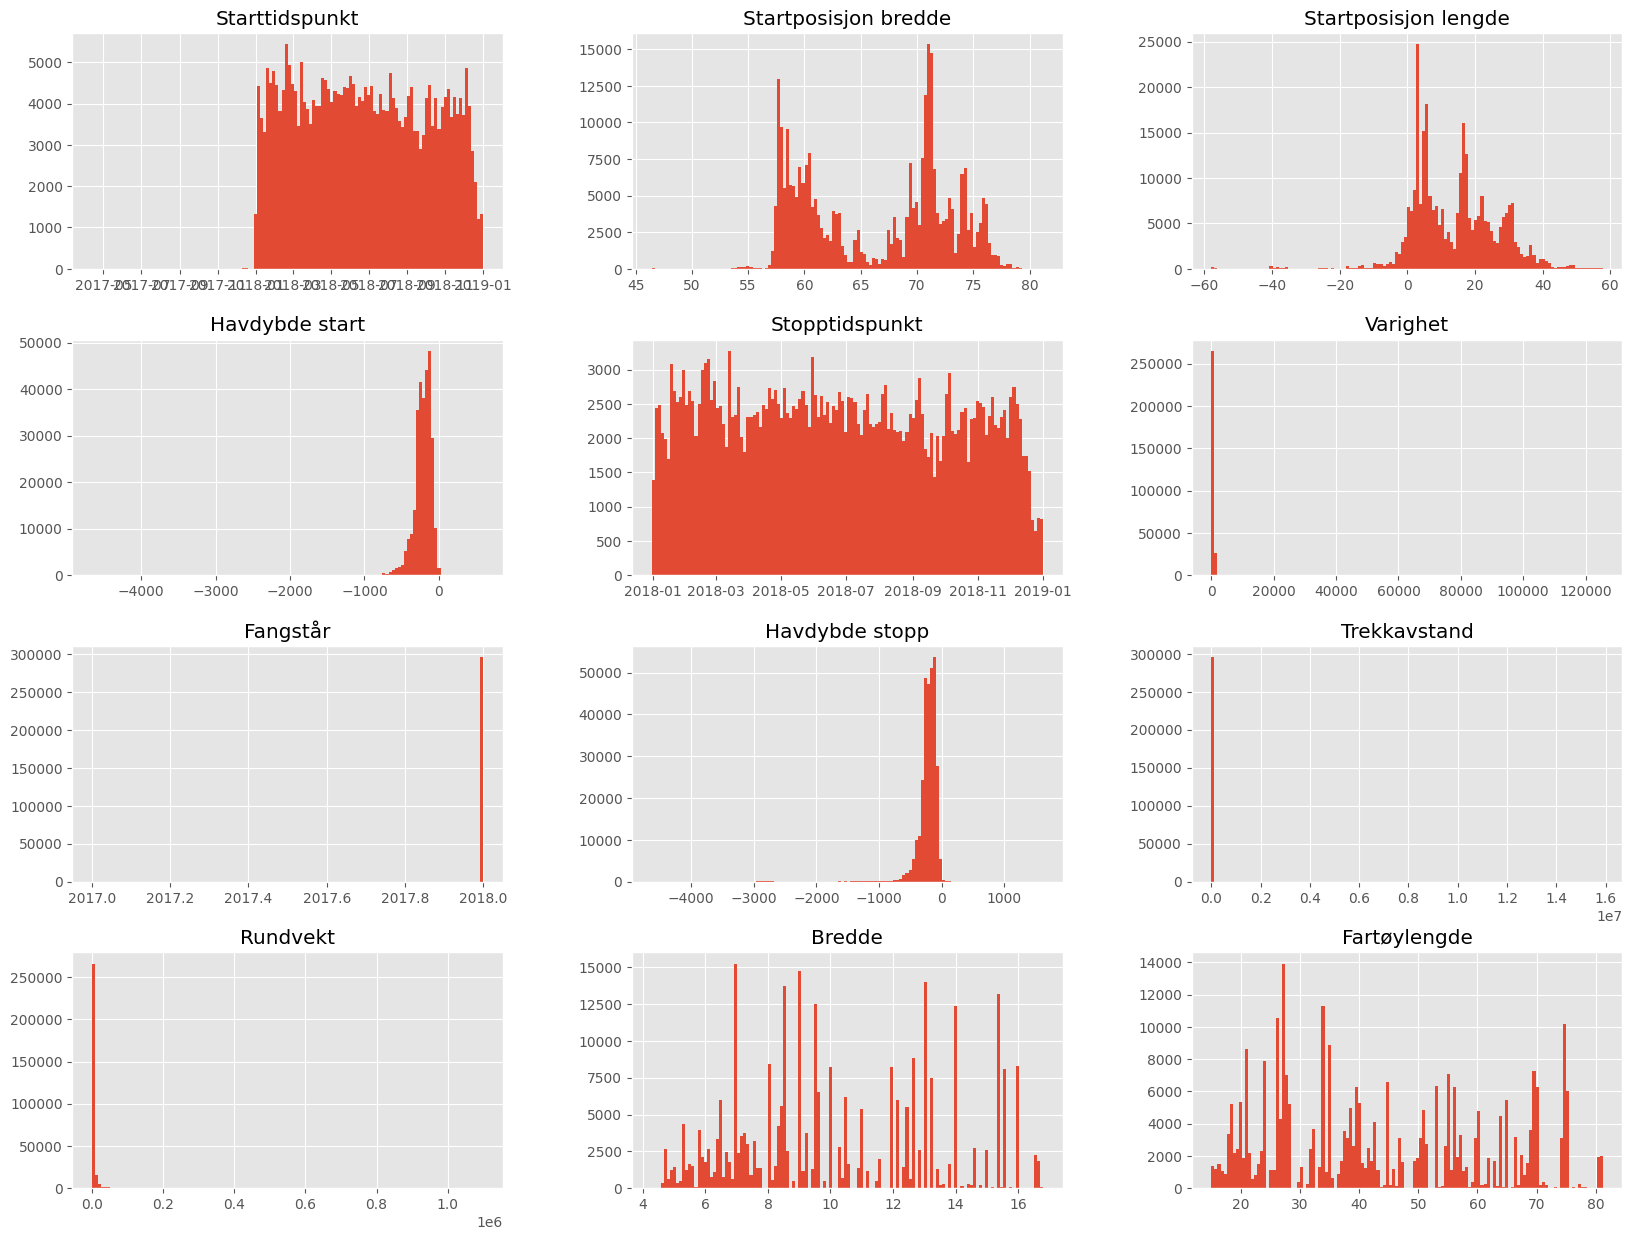

In [21]:
df.hist(bins=128, figsize=(20,15));plt.show()

In the resulting histogram its clear that some columns, such as "Varighet" and "Rundvekt" have outliers that can affect the quality of our models. Outliers are values $1.5 \cdot IQR$ (IQR = interquartile range) from the nearest quartile (Devore, 2021, p. 37). To visualize these outliers we will create boxplot.

In [22]:
def draw_boxplots(variables):
    num_of_features = len(variables)
    
    num_of_columns = 5
    num_of_rows = int(np.ceil(num_of_features / num_of_columns))
    
    fig, axes = plt.subplots(nrows=num_of_rows, ncols=num_of_columns, figsize=(15, num_of_rows * num_of_columns))
    axes = axes.flatten()

    for i, col in enumerate(variables):
        df.boxplot(column=col, ax=axes[i])
    
    # Hide empty subplots when (number_of_features < num_of_rows * num_of_columns)
    for i in range(num_of_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

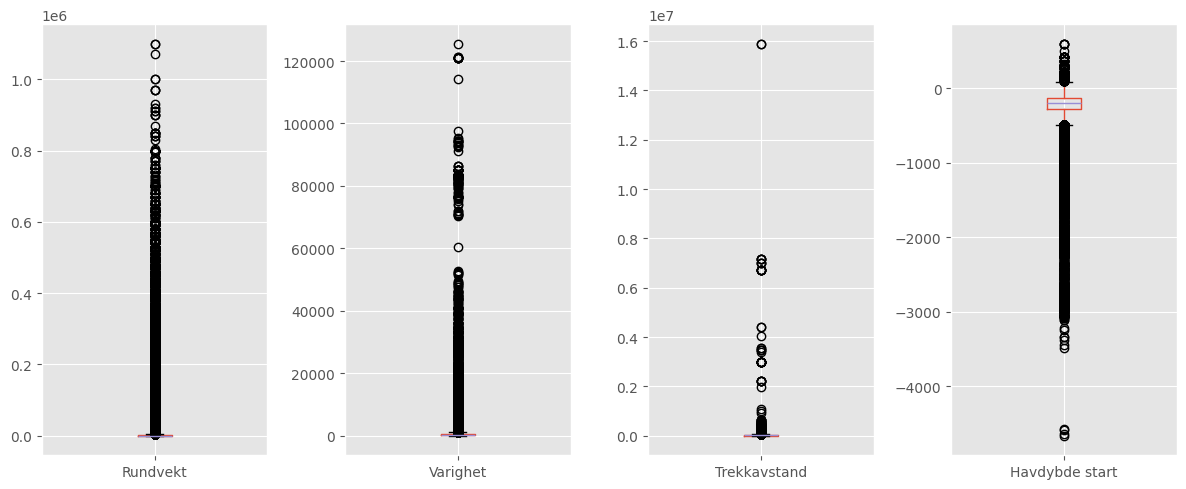

In [23]:
heavy_outliers = ['Rundvekt', 'Varighet', 'Trekkavstand', 'Havdybde start']
draw_boxplots(heavy_outliers)

We observe a large amount of outliers in these variables. Now, we will count the number of outliers.

In [24]:
def find_outlier_value(feature : str):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    lower_bound_extreme = q1 - 3 * iqr
    upper_bound_extreme = q3 + 3 * iqr
    
    return lower_bound, upper_bound, lower_bound_extreme, upper_bound_extreme

In [25]:
shape = []

for feature in heavy_outliers:
    lower, upper, lower_extreme, upper_extreme = find_outlier_value(feature)
    count = df.query(f'(`{feature}` < @lower) or (`{feature}` > @upper)').shape[0]
    count_extreme = df.query(f'(`{feature}` < @lower_extreme) or (`{feature}` > @upper_extreme)').shape[0]
    shape.append({'Feature': feature, 'Outliers': count, 'Extreme outliers': count_extreme})

outliers_df = pd.DataFrame(shape)
print(outliers_df)

          Feature  Outliers  Extreme outliers
0        Rundvekt     44106             30123
1        Varighet     24844              4132
2    Trekkavstand      5656               997
3  Havdybde start      9919              3290


We have many (extreme) outliers, specificly in the feature "Rundvekt". This may have a negative effect on our models, and we therefore need to take action. We will come back to this when we talk about scaling.

### Categorizing date variable

In order for us to better be able to use and analyze information currently contained in 'Starttidspunkt', we have to engage in some feature engineering. Right now, each datetime object is a unique continuous value. This makes it hard to spot potential patterns regarding dates and time. Binning these into their respective season makes it easier to handle.

In [26]:
df['month'] = df['Starttidspunkt'].dt.month
df = df.drop(['Starttidspunkt'], axis=1)

def map_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['month'].apply(map_to_season)

df = pd.get_dummies(df, columns=['Season'])
df = df.drop(['month'], axis=1)

### Counting categorical features

When we will build our models, many of the models we will build do not directly support categorical data. We need to give these values a numerical value, for example through one hot encoding. This process turn our 20+ columns into hundreds of columns. This results in increasing complexity, which can make some of our models, like KNN, perform worse (Müller, 2016, p. 44). An easy way to reduce the complexity is to remove insignificant values from the categories.

In [27]:
def count_unique_values(df: pd.DataFrame, category: str):
    count = df[category].value_counts()
    
    percentage = df[category].value_counts(normalize=True) * 100
    
    result = pd.DataFrame({
    'Count': count,
    'Percentage': percentage
    })
    
    return result

In [28]:
def unique_values_below_percentage(df: pd.DataFrame, category: str, target: float):
    percentage = df[category].value_counts(normalize=True) * 100
    
    less_than_target = percentage[percentage < target]
    
    num_values = less_than_target.count()
    num_rows = df[category].value_counts().loc[less_than_target.index].sum()
    
    return num_values, num_rows

In [29]:
count_unique_values(df, "Art - FDIR")

,Count,Percentage
Art - FDIR,,
Torsk,56079,18.958226
Sei,42299,14.299720
Hyse,38792,13.114133
Lange,17259,5.834626
Uer (vanlig),14121,4.773785
...,...,...
Skjeggtorsk,1,0.000338
Sagtang,1,0.000338
Annen makrell,1,0.000338


We observe that many Art has 118 columns, 11 of which only have 1 observation. We will investigate if we can remove some of these values from our dataset

In [30]:
def print_unique():
    print(f"Number of unique values in column below {target_percentage} %: {values}")
    print(f"Number of rows {rows}")

In [31]:
target_percentage = 0.05
values, rows = unique_values_below_percentage(df, "Art - FDIR", target_percentage)
print(f"Number of unique values in column below {target_percentage} %: {values}")
print(f"Number of rows {rows}")

Number of unique values in column below 0.05 %: 63
Number of rows 1657


In [32]:
target_percentage = 0.05
values, rows = unique_values_below_percentage(df, "Hovedområde start", target_percentage)
print(f"Number of unique values in column below {target_percentage} %: {values}")
print(f"Number of rows {rows}")

Number of unique values in column below 0.05 %: 14
Number of rows 757


By removing values which have less than 0.05 % observations we will reduce the number of columns after one hot encoding by over 70 columns. This should hopefully make our models perform better.

In [33]:
def remove_values_below_percentage(df: pd.DataFrame, category: str, target: float):
    percentage = df[category].value_counts(normalize=True) * 100
    
    less_than_target = percentage[percentage < target]
    
    return df[~df[category].isin(less_than_target.index)]

In [34]:
df = remove_values_below_percentage(df, "Art - FDIR", target_percentage)
df = remove_values_below_percentage(df, "Hovedområde start", target_percentage)
df = remove_values_below_percentage(df, "Redskap FDIR", target_percentage)

## Step 4 : Feature relationship

Now that we have explored the individual variables by themselves, we will do a multivariate analysis. This will help us understand the relationship between the variables in the dataset.

We'll start by using a pair-plot of the numerical variables.

In [2]:
features_numeric = ['Fartøylengde', 'Rundvekt', 'Varighet', 'Trekkavstand', 'Havdybde start']

In [3]:
sns.pairplot(
    data=df,
    vars=features_numeric,
    hue='Redskap FDIR',
)
plt.show()

NameError: name 'sns' is not defined

Here we see that there is clearly a pattern between "Fartøylengde" and "Rundvekt". IT also appears to be some pattern of "Havdybde start" and "Redskap FDIR".

We can also create a correlation matrix to explore the linear association between our variables.

In [4]:
features = [ 'Season_Winter', 'Season_Spring','Season_Summer', 
            'Season_Fall', 'Fartøylengde', 'Rundvekt', 'Varighet',
            'Trekkavstand', 'Havdybde start']
df_corr = df[features].corr()
sns.heatmap(df_corr, annot=True)

NameError: name 'df' is not defined

While there few highly correlated values, we can see that 'Fartøylengde' is somewhat correlated with both 'Rundvekt' and 'Havdybde_start'. In addition, there seems to be an increase in distance ('Trekkavstand') during winter compared to the other seasons.

### Categorical variables

A method we can use to see how our categorical variables relate to our numerical target variable, is analysis of variance (Anova). Anova is used to determine if there is statistically significant difference between three or more unrelated groups (The University of Utah, 2024)

In [5]:
from scipy import stats

def calculate_anova(target, features):
    shape = []
    for feature in features:
        anova_result = stats.f_oneway(*[group[target].values for name, group in df.groupby(feature)])
        
        shape.append({'Feature': feature, "Values": f"F={anova_result.statistic}, p-value={anova_result.pvalue}"})
    
    return pd.DataFrame(shape)

In [6]:
features_categorical = ["Art - FDIR", "Redskap FDIR", "Hovedområde start"]

calculate_anova("Rundvekt", ["Art - FDIR", "Redskap FDIR", "Hovedområde start"])

NameError: name 'df' is not defined

A low p-value indicates that the groups in the variable have significant differance. A large F-value like is an indication that a significant portion of the variance in "Rundvekt" is explained by the variance of the groups in the other variable.

To support this argument we will graph these categorical variables with "Rundvekt". 

In [ ]:
categorical_variables = ["Art - FDIR", "Redskap FDIR", "Hovedområde start"]
colors = ["Blue", "red", "green"]
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

for i, category in enumerate(categorical_variables):
    axes[i].scatter(df["Rundvekt"], df[category], alpha=0.1, color=colors[i % len(colors)])
    axes[i].set_title(category)
    axes[i].set_xlabel("Rundvekt")
    axes[i].set_ylabel("Values")

plt.tight_layout()
plt.show()

This confirms a large spread difference between the groups of the categorical variables, and we can conclude that these features have some significance for explaining "Rundvekt".

### One hot encoding

In [7]:
features = [ 'Season_Winter', 'Season_Spring','Season_Summer', 
            'Season_Fall', 'Fartøylengde', 'Rundvekt', 'Varighet',
            'Trekkavstand', 'Havdybde start', 'Art - FDIR', 'Hovedområde start', 'Redskap FDIR']

df_n = df[features].copy()


NameError: name 'df' is not defined

In [ ]:
df_n = pd.get_dummies(df_n, columns=['Art - FDIR'])
df_n = pd.get_dummies(df_n, columns=['Redskap FDIR'])
df_n = pd.get_dummies(df_n, columns=['Hovedområde start'])


In [ ]:
df_n

<a id="part_b"></a>
## Part B - Supervised learning

Now that we have pre-processed and analyzed our data, we are going to train three models using a machine learning technique called 'supervised learning'.
A model that generalizes well, will (hopefully) be able to predict live weight values based on the information it gets from the other features of our dataset. 
But in order to make a prediction about unlabeled data, it might be useful to let it train on a big chunk of labeled data. By 'labeled data' we mean data that contains the correct answer(label). This enables it to map certain feature values/patterns to specific values of live weight. 

### Regression vs Classification

The aim for a classification algorithm is to predict a correct label in the form of a categorical value or a limited, discrete set of integers. This label is taken from a predefined list of possible options. We can measure a classifiers performance by analyzing the amount of true positives, false positives, true negatives and false negatives.

As seen in the dataframe, live weight is a continuous number and thus we can't use a classifier to make predictions about its values. This is a regression problem, so the predictions are going to be real numbers calculated based on a local average or a fitted line through the data set. Our aim is to train a model that is able to predict values as close as possible to the target values. 

### Evaluation

Pre preparation the dataset and fine-tuning of different hyperparameters should hopefully result in a model that performs better than before we made the adjustments, but how do we know that it is improving?

For regression models there are several metrics that can offer us an insight into our models performance.
In this task we are going to use both the Mean Squared Error(MSE) and the R^2 score.

MSE measures the average squared difference between the actual and predicted values of the dependent variable. The value of the MSE itself largely depends on the scale of the values in our dataset, so a large or small number does not tell us much on its own.

The R^2 score gives us a value between 0 and 1 that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. In other words, it gives us a way of measuring how well our chosen features explains the variance in the target variable.

### Grid search

Each model depends on specific parameters being set to be able before it can be used for training and predictions. Since knowing the optimal values for each parameter is nearly impossible without some tweaking, we will make use of SKlearn's GridSearchCv. Grid Search works like a for loop, and allows us to test several different values in search for the best parameter values.

### Cross validation

Cross validation is the process of splitting our non-test data into a training set and a validation set. The model is trained and uses the validation to score its performance. By dividing the non-test data into $k$ datasets. Each time, you use $k-1$ datasets for training and 1 for validation. This is a process called k-fold cross validation.

By doing so one can measure the stability of our model. Since the model is trained with some unique data $k$ times, we can detect whether the model perform differently depending on the data given (Poole, 2024).

# Random Forest

A random forest is an ensemble of decision trees. Decision trees have a tendency to overfit and therefore generalize poorly to new data. The random forest deals with this by using several decision trees that are all created in a different, slightly random way. The predictions of a regression based forest are made by averaging the results produced by the individual decision trees.

Each feature is treated separately from the others in the individual nodes of the decision trees (if/else statements), so in random forests do not require much scaling or normalization.

There are a couple of reasons for choosing a random forest for this task:
- They tend to work well on big datasets
- They usually require less pre processing compared to other ML algorithms
- Overfitting is usually not an issue

The parameters chosen for random forest are number of trees (n_estimators) to be 128. A larger number is always better, but higher number have diminishing return in model performance, at cost of time (Devore, p. 88). We found 128 to be a suitable number.

For max_features, we selected log_2(features). This is generally a rule of thumb to be used with random forest regression (Devore, p. 88).

In [8]:
from sklearn.model_selection import cross_val_score, KFold

def run_rf_model(dataframe, target, number_of_trees):
    y = dataframe[[target]]
    X = dataframe.drop([target], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf = RandomForestRegressor(random_state=42, n_estimators=number_of_trees, n_jobs=-1, max_features=math.ceil(math.log2(dataframe.shape[1])))

    # Implementing cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf, X_train, np.ravel(y_train), cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Fitting the model on the whole training set
    rf.fit(X_train, np.ravel(y_train))

    y_pred = rf.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return rf, cv_scores, mse, r2


In [9]:
rf, cv_scores, mse, r2 = run_rf_model(df_n, "Rundvekt", 128)

NameError: name 'df_n' is not defined

In [ ]:
print("Random forest model results")
print("Cross-validation scores:", cv_scores)
print(f"MSE: {mse:.2f}")
print(f"r2 score: {r2:.2f}")

## KNN - regression

The predictions in KNN regressor are made by averaging the target values of the K nearest neighbors in the training set. The model needs every feature to be numeric, and it is sensitive to outliers. It calculates the square root of the sum of the squared differences between corresponding feature values to determine the distance between to data points. This is known as the Euclidean distance.

We can specify how many neighbours (K) we want it to include.

We have chosen a KNN model because its logic is quite simple compared to both the random forest and the neural network. It is interesting so see how its performance compares to the others


In [ ]:
df_Knn = df_n.copy()

In [ ]:
X = df_Knn.drop(['Rundvekt'], axis=1)
y = df_Knn[['Rundvekt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

Some of our models might be sensitive to the scale of the feature values. This meaning that a huge value in one of the features might make a much smaller value in another feature insignificant when calculating a result. This does not however mean that the small feature automatically should be consider less important than the larger feature when making a prediction. They simply might contain information about vastly different domains from the real world.

The distance between different 'Bruttotonnasje' values results in dramatically bigger numbers compared to the distances of 'Båtlengde'. To compensate for these types of gaps in values, we should consider scaling them before training the model.

SKlearn offers us a couple of different build in scaler we can use with StandardScaler, MinMax and RobustScaler as being the most common ones.

We can view scaling as a part of the model itself. A pipeline comes in handy for grouping the scaler and the regressor together. 
We can give the pipeline as an argument to our GridSearchCV along with the different parameters we want to optimize, our chosen scoring metrics, and the number of cross validation groups

Scaler: Because we wish to preserve the relationship between small and large values in our data set, we have chosen the Standard Scaler for KNN

In [ ]:

knn_pipe = Pipeline([('mms', StandardScaler()),
                     ('knn', KNeighborsRegressor())])

params = [{'knn__n_neighbors': [ 35, 50, 80],
         'knn__weights': ['uniform', 'distance']}]

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=5,
                      n_jobs=-1)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

In [ ]:
predictions = gs_knn.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [ ]:
print("KNN model results")
print(f"MSE: {mse:.2f}")
print(f"r2 score: {r2:.2f}")

## Neural network/deep learning

The task requires us to implement one deep learning model. 'Deep learning' refers to a family of algorithms known as neural networks. (Müller, 2016, p. 104)

The type of neural network used in this task is an MLP (Multi Layered Perceptron). This is a feed forward network that uses back propagation to improve.

It consists of input nodes, output node(s) and possible 'hidden layers' of nodes in between them. Each node in one layer is connected to all the nodes in the next layer, and the values passed in changes for every layer they travel. Weights and biases are added to the values as they travel from one layer to the next. The value recieved by a node is then used as input for an 'activation function' that determines new value to be passed on. Neural networks are typically trained using optimization algorithms like gradient descent, where the algorithm adjusts the model parameters (weights and biases) iteratively to minimize a loss function.

We have chosen the optimization algorithm 'Adam' as our solver. The solver is used to update the model parameters during training. The choice of solver plays a crucial role in determining how weights and biases are updated.

Scaler: Neural networks require input features to exhibit uniform variation, ideally centered around a mean of 0 and a variance of 1. The Standard Scaler again seem like a good choice

In [ ]:
mlp_pipe = Pipeline([
    ('mms', StandardScaler()),
    ('mlp', MLPRegressor())
])
mlp_params = {
    'mlp__activation': ['relu'],
    'mlp__hidden_layer_sizes': [(12, 12)], 
    'mlp__solver': ['adam'],
    'mlp__max_iter': [100, 200, 500],
    'mlp__random_state': [42]
}

gs_mlp = GridSearchCV(
    estimator=mlp_pipe,
    param_grid=mlp_params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

gs_mlp.fit(X_train, np.ravel(y_train))
mlp_y_pred = gs_mlp.predict(X_test)
mse = mean_squared_error(y_test, mlp_y_pred)
r2 = r2_score(y_test, mlp_y_pred)

In [ ]:
print("Deep learning results")
print(f"MSE: {mse:.2f}")
print(f"r2 score: {r2:.2f}")
gs_mlp.best_params_

<a id="part_c"></a>
## Part C: Unsupervised learning

### Clustering

Clustering algorithms fall under the term unsupervised learning. They aim to group similar data together into clusters, providing us with a way of discovering possible patterns in big, messy data. We as data scientists can use clustering and other forms of unsupervised learning to explore data and to understand it better. (Müller, 2016, p. 146)

DBSCAN is an interesting clustering algorithm that identifies dense regions in the feature space and forms clusters based on this density of data points. This flexibile approach allows it to form clusters of complex shapes and various sizes, in this way it contrasts the alternative algorithms like K-means and agglomerative clustering.
There is also no need to pre define the amount of clusters we want. In our case we have no pre knowledge regarding how our dataset should be partitioned into clusters, so DBSCAN seems like a reasonable choice.

Scaler: The standard scaler is again a good choice. This allows us to limit the distances between the data point, 
which again makes it easier to adjust epsilon to a reasonable number

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Using a sample of 100000, because it took too long time with more
df_copy = df.copy().sample(100000)

# Preprocessing
relevant_columns = ['Art - FDIR', 'Redskap FDIR', 'Varighet', 'Rundvekt']
df_filtered = df_copy[relevant_columns]

# Encoding categorical data
categorical_features = ['Art - FDIR', 'Redskap FDIR']
column_transformer = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(), categorical_features)
], remainder='passthrough')

# Apply column transformer
df_encoded = column_transformer.fit_transform(df_filtered)

# Feature scaling
scaler = StandardScaler(with_mean=False)
df_scaled = scaler.fit_transform(df_encoded)

# Running DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5, n_jobs=-1)
clusters = dbscan.fit_predict(df_scaled)

df_copy['Cluster'] = clusters

plt.figure(figsize=(10, 6))
df_copy['Cluster'].value_counts().plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Operations')
plt.show()

In [ ]:
def plot_clusters(column: str):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

    for i, cluster_id in enumerate(largest_clusters):
        cluster_data = df_copy[df_copy['Cluster'] == cluster_id]

        category_counts = cluster_data[column].value_counts()

        category_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[i], startangle=90, counterclock=False)
        axes[i].set_title(f'Cluster {cluster_id}')
        axes[i].set_ylabel('')

    plt.tight_layout()
    plt.show()

In [ ]:
# Determine the 9 largest clusters by the number of operations
cluster_sizes = df_copy['Cluster'].value_counts().head(9)
largest_clusters = cluster_sizes.index.tolist()

In [ ]:
plot_clusters("Art - FDIR")

In [ ]:
plot_clusters("Redskap FDIR")

## References

Devore, J. L. (2021). *Modern mathematical statistics with applications* (3. ed.) Springer.

Müller, A. C. (2016). *Introduction to machine learning with Python : a guide for data scientists*. O'Reilly

Poole, D. L. (2024, 27. april). 7.4 Overfitting. Artificial Intelligence 3E. https://artint.info/3e/html/ArtInt3e.Ch7.S4.html

Poole, D. L. (2024, 27. april). 8.3 Improving Generalization. Artificial Intelligence 3E. https://artint.info/3e/html/ArtInt3e.Ch8.S3.html#p5

The University of Utah. (2024, 27. april). Analysis of Variance (ANOVA). Sociology 3112. https://soc.utah.edu/sociology3112/anova.php